In [2]:
%matplotlib notebook

from matplotlib import cm, scale, pyplot as plt
import ipywidgets as widgets
import numpy as np
from pathlib import Path

In [3]:
def widget_g_plot_overlaid(gs, phi=0):
    fig, ax = plt.subplots(figsize=(9.5,8))
    ax.set_aspect("equal")
    
    def g_plot_overlaid(phi):
        ax.clear()
        for i, g in enumerate(gs):
            R, z, _ = np.transpose(g[:,:,phi,:], (2,0,1))
            ax.plot(R,z, c=f"C{i}", lw=0.3, zorder=101)
            ax.plot(R.T,z.T, c=f"C{i}", lw=0.3, zorder=102)
        fig.tight_layout()
    
    phi = widgets.IntSlider(min=0, max=gs[0].shape[2]-1, value=phi, step=1)
    widgets.interact(g_plot_overlaid, phi = phi)

In [10]:
grid_object = "EIM-2022-04-27T18:30:37"
# "EIM-ErrorFullT-2022-04-27T10:46:41"  # "EIM-2022-04-27T08:55:48" #
basepath = Path(f"/u/phg/grid/tracer/W7X/EMC3compliance/{grid_object}")

In [11]:
gs = []
for i, module_path in enumerate(sorted(basepath.iterdir())):
    module = np.load(module_path / "grid.npz")["data"]
    gs.append(module)

<IPython.core.display.Javascript object>


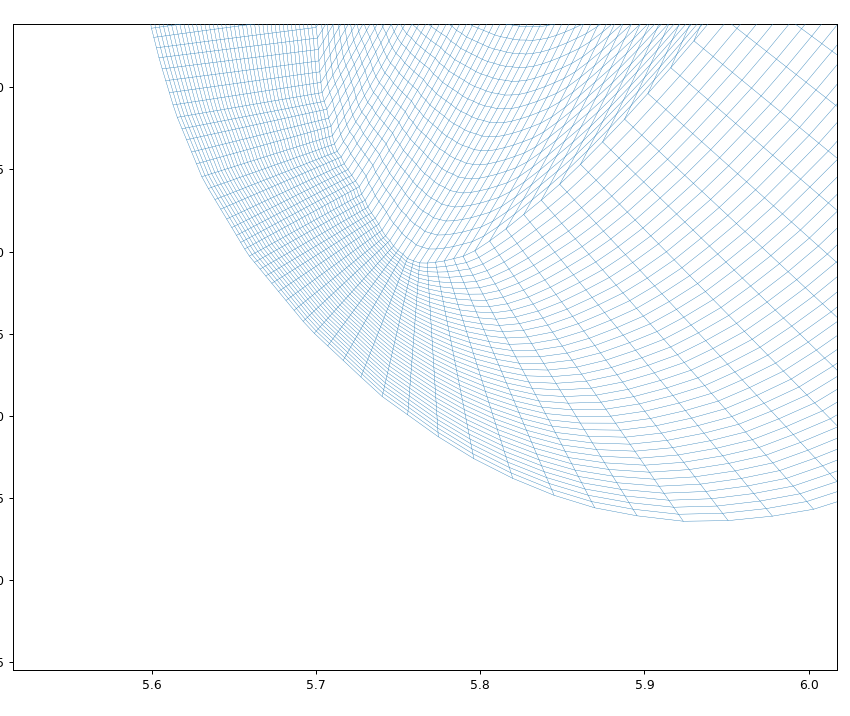

interactive(children=(IntSlider(value=0, description='phi', max=70), Output()), _dom_classes=('widget-interact…

In [12]:
widget_g_plot_overlaid(gs[2:3], phi=0)

In [9]:
#np.savez("new_full_mod_EIM_ERR-test", data=gs[2])